In [1]:
from keckcode.deimos import deimosmask1d
from specim_test.specim.specfuncs import spec2d, spec1d
from astropy.io import fits

import numpy as np
import matplotlib.pyplot as plt
import glob

In [2]:
file_loc = '../galaxy_spectra/LRIS_data/LRIS_red_data_20201120/keck_lris_red_B/Science/*'

In [3]:
file_list = []
#out_file = []
for i,p in enumerate(glob.glob(file_loc)):
    if 'spec1d' in p and  'J0248' in p:
        if '.fits' in p:
            file_list.append(p)
            #frame = p.split('_')[-3][:4]
            #out_file.append('0053m1_r'+ frame + '_cleaned.fits')
            print(p)

../galaxy_spectra/LRIS_data/LRIS_red_data_20201120/keck_lris_red_B/Science/spec1d_r201121_0038-J0248+1913_LRISr_2020Nov21T104024.845.fits
../galaxy_spectra/LRIS_data/LRIS_red_data_20201120/keck_lris_red_B/Science/spec1d_r201121_0037-J0248+1913_LRISr_2020Nov21T095645.974.fits
../galaxy_spectra/LRIS_data/LRIS_red_data_20201120/keck_lris_red_B/Science/spec1d_r201121_0039-J0248+1913_LRISr_2020Nov21T112410.282.fits


In [4]:
spec1 = deimosmask1d.DeimosMask1d(file_list[0])
spec2 = deimosmask1d.DeimosMask1d(file_list[1])

Reading 3 spectra from:
  ../galaxy_spectra/LRIS_data/LRIS_red_data_20201120/keck_lris_red_B/Science/spec1d_r201121_0038-J0248+1913_LRISr_2020Nov21T104024.845.fits
Reading 3 spectra from:
  ../galaxy_spectra/LRIS_data/LRIS_red_data_20201120/keck_lris_red_B/Science/spec1d_r201121_0037-J0248+1913_LRISr_2020Nov21T095645.974.fits


In [6]:
spec = spec1.coadd(spec2)


Extracted spectra in exposure 1: 3
Extracted spectra in exposure 2: 3

Number of matched spectra in all 2 exposures: 3
Reading 3 spectra from input table and spectrum dictionary


In [7]:
spec3 = deimosmask1d.DeimosMask1d(file_list[2])

Reading 3 spectra from:
  ../galaxy_spectra/LRIS_data/LRIS_red_data_20201120/keck_lris_red_B/Science/spec1d_r201121_0039-J0248+1913_LRISr_2020Nov21T112410.282.fits


In [8]:
spec = spec.coadd(spec3)


Extracted spectra in exposure 1: 3
Extracted spectra in exposure 2: 3

Number of matched spectra in all 2 exposures: 3
Reading 3 spectra from input table and spectrum dictionary


In [9]:
specid = [] #np.zeros(coadded_spectra.nspec)
info = spec.slitinfo
#print(info)
for i in range(spec.nspec):
    spec_id = '%d_%d_%d_%d' % (info['det'][i], info['slitid'][i], info['objid'][i], info['spatloc'][i])
    specid.append(spec_id)
    print(spec_id)

2_291_1_86
2_291_2_115
2_291_3_162


spec_id : 2_291_1_86


<IPython.core.display.Javascript object>


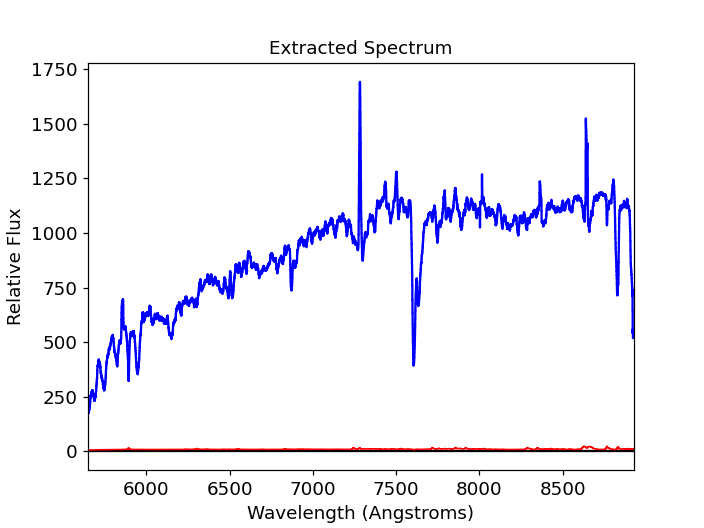

spec_id : 2_291_2_115


<IPython.core.display.Javascript object>


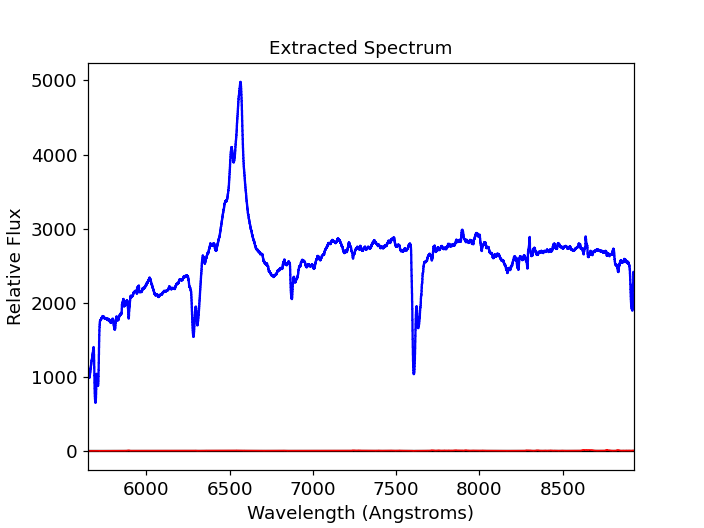

spec_id : 2_291_3_162


<IPython.core.display.Javascript object>


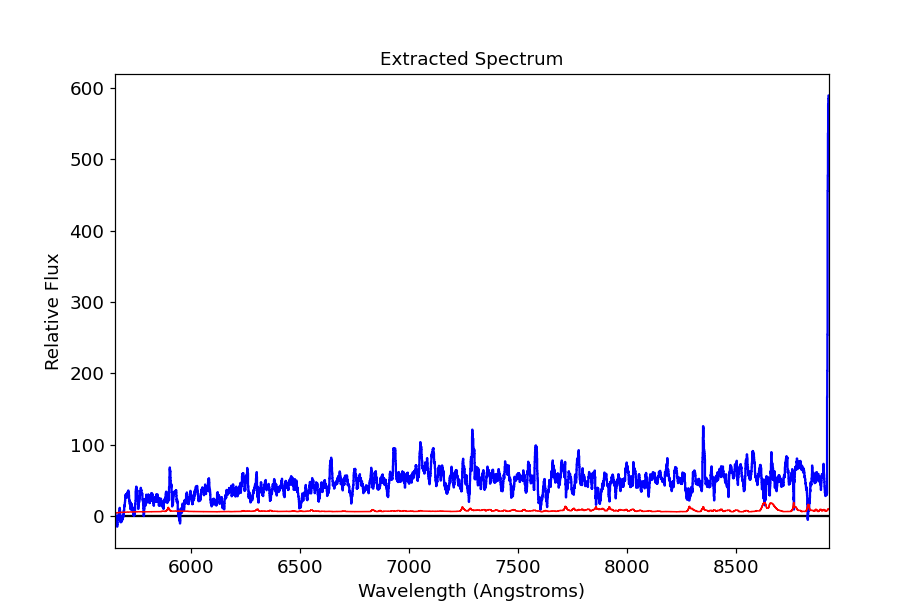

In [11]:
%matplotlib notebook

for i in range(len(specid)):
    print('spec_id : %s' %specid[i])
    spec[specid[i]].smooth(15)

In [15]:
sp1 = spec1d.Spec1d(wav=spec[specid[0]]['wav'], flux=spec[specid[0]]['flux'], var=spec[specid[0]]['var'],
                     trimsec=[0, -1])

 Spectrum Start:  5649.99
 Spectrum End:     8925.46
 Dispersion (1st pixel):   0.77
 Dispersion (average):      0.80



<IPython.core.display.Javascript object>


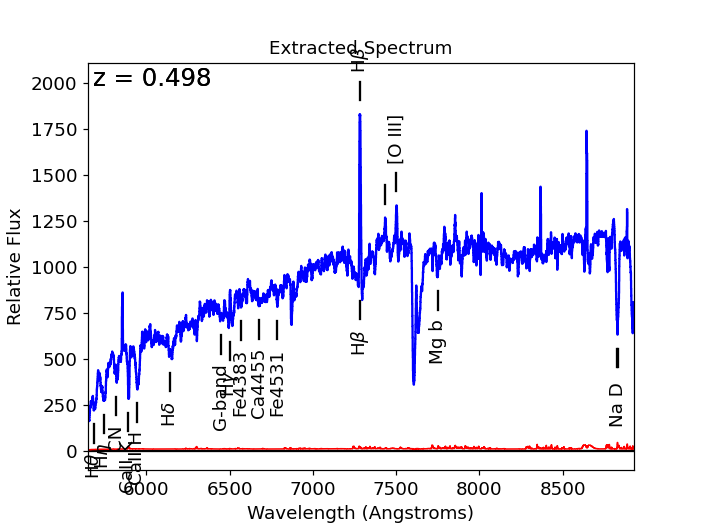


Line        lambda_rest  lambda_obs
----------  -----------  -----------
H-theta       3797.00       5687.91
H-eta         3835.00       5744.83
CN bandhd     3883.00       5816.73
CaII K        3933.67       5892.64
CaII H        3968.47       5944.77
H-delta       4101.00       6143.30
G-band        4305.00       6448.89
H-gamma       4340.00       6501.32
Fe4383        4383.00       6565.73
Ca4455        4455.00       6673.59
Fe4531        4531.00       6787.44
H-beta        4861.00       7281.78
Mg I (b)      5176.00       7753.65
Na I (D)      5889.95       8823.15
Na I (D)      5895.92       8832.09


Line        lambda_rest  lambda_obs
----------  -----------  -----------
H-beta        4861.00       7281.78
[O III]       4962.00       7433.08
[O III]       5007.00       7500.49



In [16]:
sp1.smooth(7)
sp1.mark_lines('abs', z=0.498, usesmooth=True)
sp1.mark_lines('strongem', z=0.498, usesmooth=True)

In [17]:
sp2 = spec1d.Spec1d(wav=spec[specid[1]]['wav'], flux=spec[specid[1]]['flux'], var=spec[specid[1]]['var'],
                     trimsec=[0, -1])

 Spectrum Start:  5649.94
 Spectrum End:     8925.29
 Dispersion (1st pixel):   0.77
 Dispersion (average):      0.80



<IPython.core.display.Javascript object>


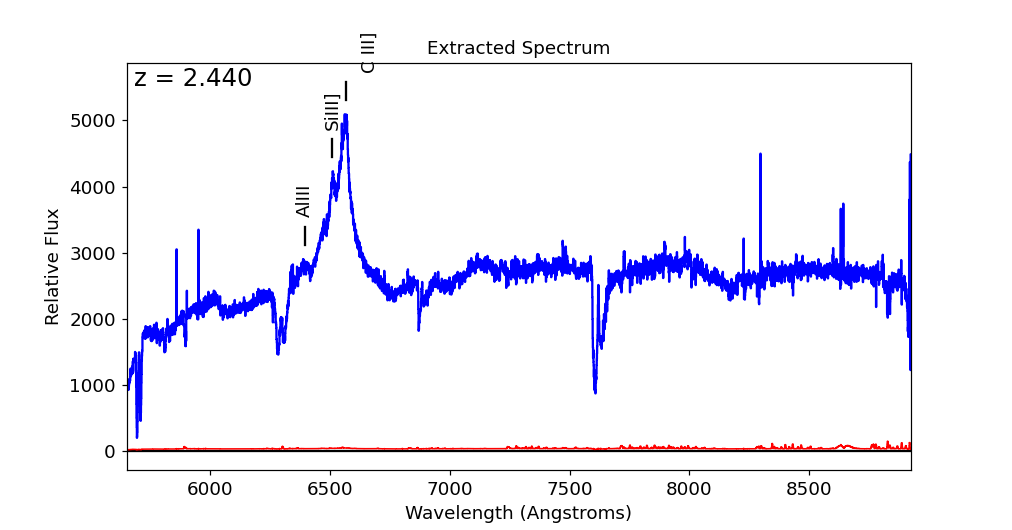


Line        lambda_rest  lambda_obs
----------  -----------  -----------
Al III        1858.70       6393.93
Si III]       1892.00       6508.48
C III]        1908.70       6565.93



In [19]:
sp2.smooth(1)
#sp1.mark_lines('abs', z=0.498, usesmooth=True)
sp2.mark_lines('strongem', z=2.44, usesmooth=True)

In [23]:
sp3 = spec1d.Spec1d(wav=spec[specid[2]]['wav'], flux=spec[specid[2]]['flux'], var=spec[specid[2]]['var'],
                     trimsec=[0, -10])

 Spectrum Start:  5649.86
 Spectrum End:     8917.85
 Dispersion (1st pixel):   0.77
 Dispersion (average):      0.80



<IPython.core.display.Javascript object>


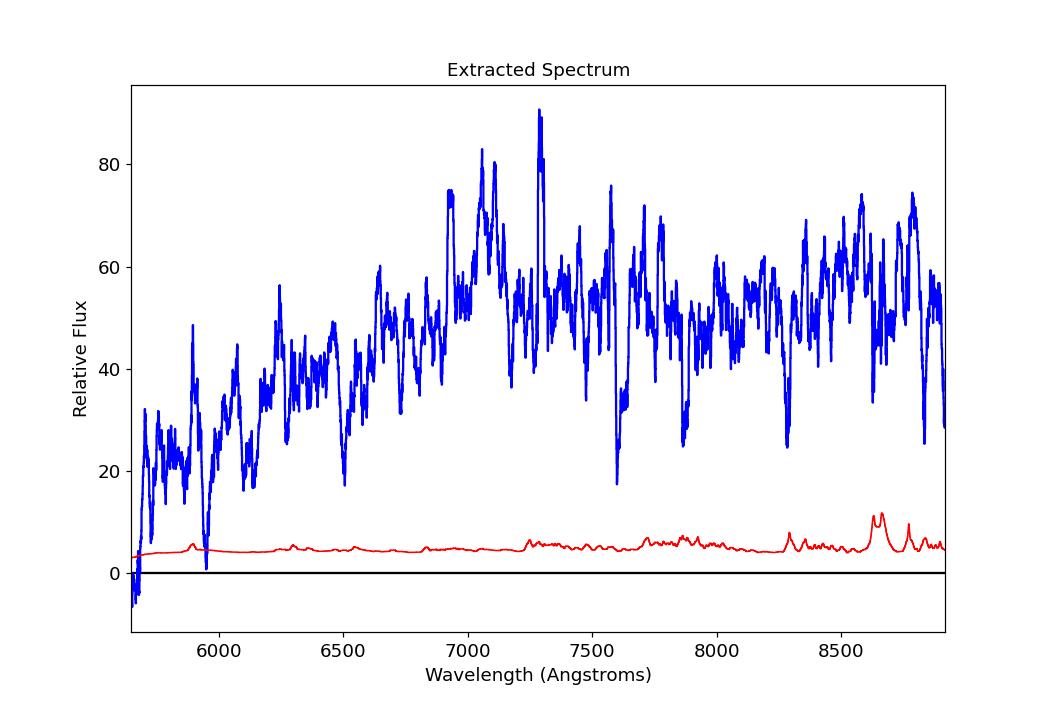

In [26]:
sp3.smooth(31)
#sp1.mark_lines('abs', z=0.498, usesmooth=True)
#sp2.mark_lines('strongem', z=2.44, usesmooth=True)